In [1]:
import numpy as np

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
def split(array, nrows, ncols):
    """Split a matrix into sub-matrices."""
    r, h = array.shape
    return (array.reshape(h//nrows, nrows, -1, ncols).swapaxes(1, 2).reshape(-1, nrows, ncols))

In [6]:
os.chdir("..")

In [8]:
images_path = r"images"

In [9]:
im = cv2.imread(os.path.join(images_path,'20180828_110013_R_OPT_512x1024x128_ILM_Enface_Avg_IMG_JPG.jpg'),cv2.IMREAD_UNCHANGED)
mask = cv2.imread(os.path.join(images_path,'mask_20180828_110013_R_OPT_512x1024x128_ILM_Enface_Avg_IMG_JPG.jpg'),cv2.IMREAD_UNCHANGED)

In [83]:
equ = cv2.equalizeHist(im)
gc1 = gammaCorrection(im,0.5)
gc2 = gammaCorrection(im,1.5)
ni = 255-im

In [76]:
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

In [119]:
def histogram_function(img):
    hist_lap = np.histogram(img,np.arange(0,256,1))
    return hist_lap[0]/(img.size)

In [117]:
def thresholding_fun(im,th = None, otsu=False):
    if otsu == True:
        bim = cv2.threshold(im,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    else:
        bim = cv2.threshold(im,th,255,cv2.THRESH_BINARY)
    return bim


<BarContainer object of 255 artists>

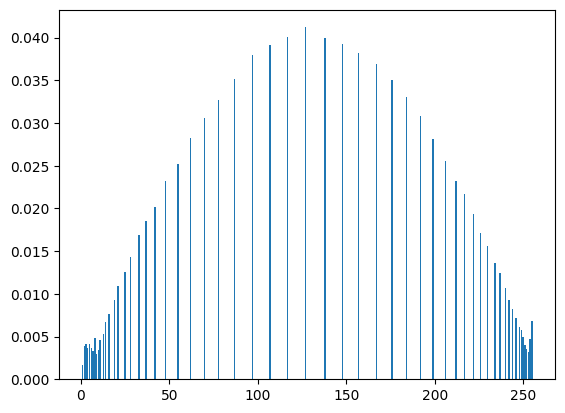

In [122]:
plt.bar(np.arange(1,256,1),histogram_function(equ))

In [143]:
temp1 = [40,50]
name2+'_binary_otsu_{}'.format(temp1[0])

'Gamma Corrected 1.5_binary_otsu_40'

In [144]:
def laplacian_function(im):
    x,y = np.gradient(im)
    xx, xy = np.gradient(x)
    yx,yy = np.gradient(y)
    lap = abs(xx+yy)
    lap_norm = 255*(lap/lap.max())
    lap_norm = lap_norm.astype(np.uint8)
    return lap_norm

In [139]:
big_pic = r'big_picture'

In [149]:
for name_,name2 in zip([im,ni,equ,gc1,gc2],['Original Image','Negative Image','Histogram equalized Image','Gamma Corrected 0.5','Gamma Corrected 1.5']):
    cv2.imwrite(os.path.join(big_pic,name2+'.png'),name_)
    plt.bar(np.arange(1,256,1),histogram_function(name_))
    plt.savefig(os.path.join(big_pic,name2+'_histogram.png'))
    plt.close()
    temp1 = thresholding_fun(name_,otsu=True)
    cv2.imwrite(os.path.join(big_pic,name2+'_binary_otsu_{}.png'.format(temp1[0])), temp1[1])
    cv2.imwrite(os.path.join(big_pic,name2+'_laplacian.png'),laplacian_function(name_))
    plt.bar(np.arange(1,256,1),histogram_function(laplacian_function(name_)))
    plt.savefig(os.path.join(big_pic,name2+'_laplacian_histogram.png'))
    plt.close()
    temp1 = thresholding_fun(laplacian_function(name_),otsu=True)
    cv2.imwrite(os.path.join(big_pic,name2+'_laplacian_binary_otsu_{}.png'.format(temp1[0])),temp1[1])
    temp1 = thresholding_fun(laplacian_function(name_),th = 100)
    cv2.imwrite(os.path.join(big_pic,name2+'_laplacian_binary_otsu_{}.png'.format(temp1[0])),temp1[1])

#Laplacian

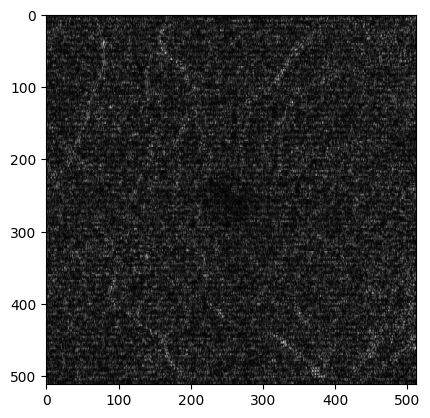

In [13]:
plt.imshow(lap_norm,cmap='gray')
#cv2.imwrite(os.path.join(images_path,'laplacian.png'),lap_norm)

In [22]:
hist_lap = np.histogram(lap_norm,bins=256)

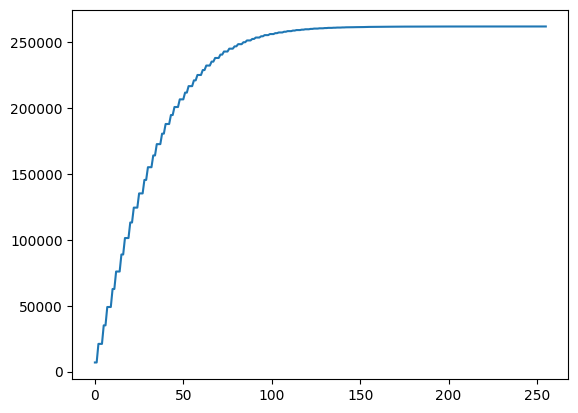

In [42]:
plt.plot(np.cumsum(hist_lap[0]))

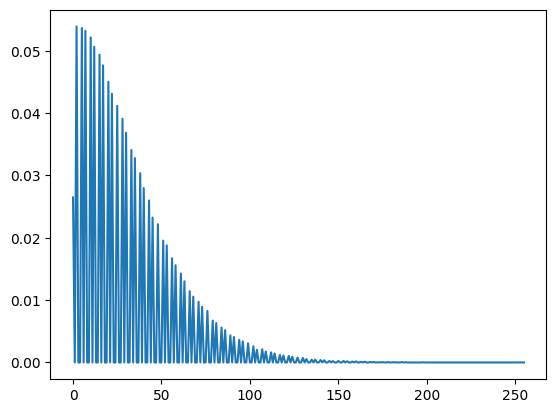

In [63]:
plt.plot(pdf)

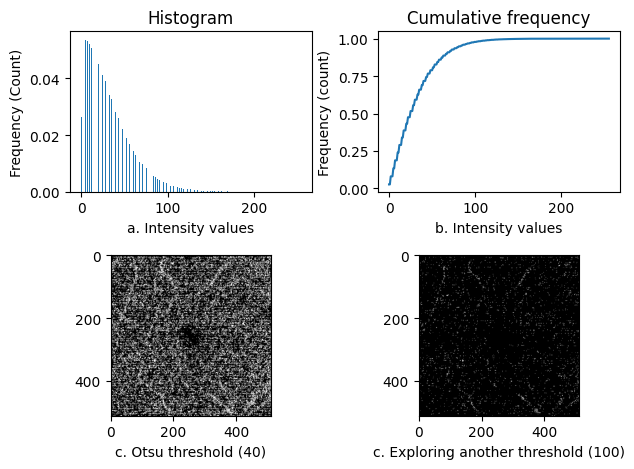

In [74]:
pdf = hist_lap[0]/(512*512)

fig,ax = plt.subplots(2,2)
ax[0,0].bar(hist_lap[1][:-1],pdf)
#ax[0,0].plot(np.cumsum(pdf),color='r')
ax[0,0].set_xlabel('a. Intensity values')
ax[0,0].set_ylabel('Frequency (Count)')
ax[0,0].set_title('Histogram')

ax[0,1].plot(np.cumsum(pdf))
ax[0,1].set_xlabel('b. Intensity values')
ax[0,1].set_ylabel('Frequency (count)')
ax[0,1].set_title('Cumulative frequency')

ax[1,0].imshow(lap_bin50[1],cmap='gray')
ax[1,0].set_xlabel('c. Otsu threshold (40)')

ax[1,1].imshow(lap_bin100[1],cmap='gray')
ax[1,1].set_xlabel('c. Exploring another threshold (100)')

plt.tight_layout()

plt.savefig(os.path.join(images_path,'laplacian_histogram_and_thresh.png'))
plt.show()

In [66]:
lap_bin100 = cv2.threshold(lap_norm,100,255,cv2.THRESH_BINARY)
lap_bin50 = cv2.threshold(lap_norm,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

In [68]:
lap_bin50[0]

40.0

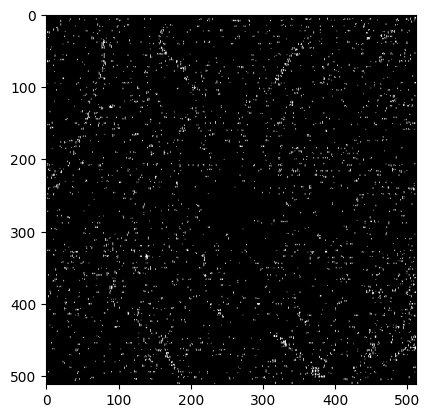

In [53]:
plt.imshow(lap_bin100[1],cmap='gray')

In [1]:

i=0
hfin = np.dstack((im[i:i+8,:],im[i:i+8,:],im[i:i+8,:]))
temp    = np.dstack(([255]*512,[0]*512,[0]*512))
for i in range(8,512,8):
    temp1   = np.dstack((im[i:i+8,:],im[i:i+8,:],im[i:i+8,:]))
    hfin    = np.vstack((hfin,temp,temp1))

NameError: name 'np' is not defined

In [52]:
hsp = np.hsplit(hfin,512//8)
fin =  hsp[0]
temp    = np.dstack(([255]*575,[0]*575,[0]*575)).reshape(575,1,3)
for i in range(1,len(hsp)):
    fin = np.hstack((fin,temp,hsp[i]))



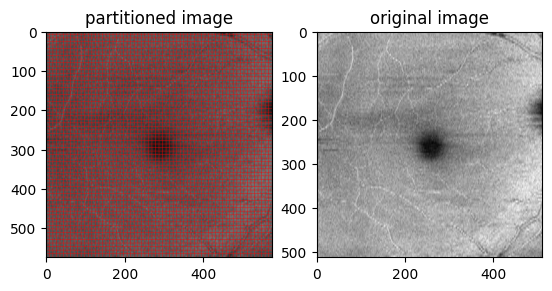

In [160]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(fin)
ax[0].title.set_text('partitioned image')
ax[1].imshow(im,cmap='gray')
ax[1].title.set_text('original image')
plt.show()

# Creating dataset of 8x8 blocks

Spliting the image into square blocks of 8x8 - Non overlapping; because statistically at least 30 observations are 
considered as significant number of observations
8x8 has 64 which is greater than 30

In [211]:
blocks_im = split(im,8,8)
blocks_mask = split(mask_er,8,8)

In [216]:
labels = [] #255 in blocks_mask[0]
lis_data = []
for i in range(blocks_im.shape[0]):
    lis_data.append(list(blocks_im[i].flatten()))
    if np.any(blocks_mask[i]>240):
        labels.append(1)
    else:
        labels.append(0)


In [223]:
np.array([1]*3) - np.array([1,2,3])

array([ 0, -1, -2])

In [226]:
np.array(lis_data[0]).reshape(8,8)

array([[82, 97, 97, 89, 94, 95, 86, 81],
       [82, 97, 95, 88, 93, 94, 86, 82],
       [82, 95, 93, 87, 92, 93, 85, 83],
       [83, 93, 91, 85, 91, 90, 84, 84],
       [83, 91, 88, 84, 89, 88, 83, 86],
       [83, 89, 85, 82, 88, 86, 82, 87],
       [84, 88, 83, 81, 87, 84, 81, 88],
       [84, 87, 82, 80, 86, 83, 81, 89]], dtype=uint8)

In [218]:
df = pd.DataFrame(lis_data)
df['labels'] = labels

In [220]:
df_path = r'C:\Users\a_gadari\OneDrive - UNCG\Documents\bdml\dataframes'
df.to_csv(os.path.join(df_path,'8xblocks_labelled_dataset_mak_eroded.csv'),index=False)

# Creating Masked image      

In [60]:
mim = cv2.imread(r'C:\Users\a_gadari\OneDrive - UNCG\Desktop\20180828_110013_R_OPT_512x1024x128_ILM_Enface_Avg_IMG_JPG.jpg',cv2.IMREAD_UNCHANGED)

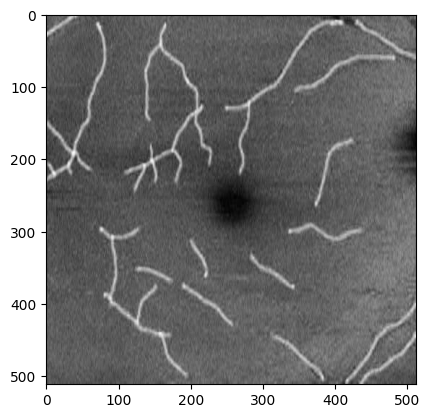

In [66]:
plt.imshow(mim[:,:,0],cmap='gray')

In [111]:
k = np.where(mim[:,:,0]>125)

In [112]:
mask = np.zeros((512,512),dtype=np.uint8)

In [113]:
for ix,jx in zip(list(k[0]),list(k[1])):
    mask[ix,jx] = 255

In [116]:
cv2.imwrite(os.path.join(images_path,'mask_20180828_110013_R_OPT_512x1024x128_ILM_Enface_Avg_IMG_JPG.jpg'),mask)

True

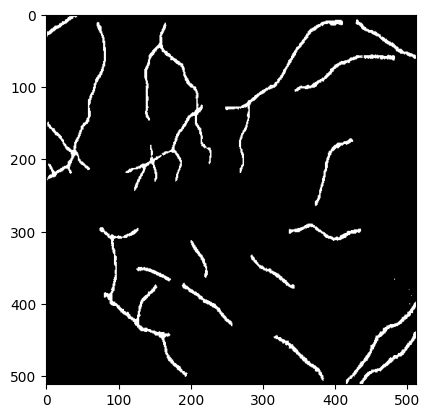

In [117]:
plt.imshow(mask,cmap='gray')

In [183]:
kernel = np.ones((3,3),dtype=np.uint8)

In [194]:
mask_er = cv2.erode(mask,kernel)

In [206]:
m

0

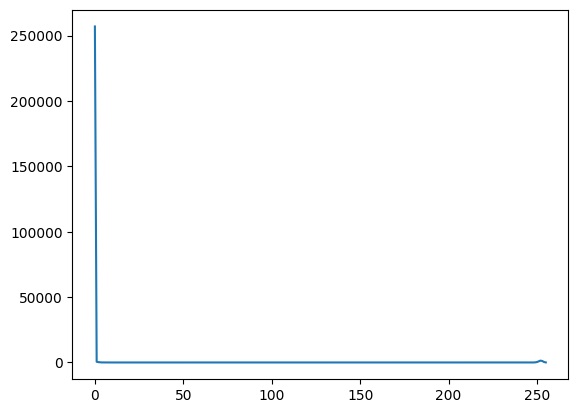

In [209]:
#zz = cv2.calcHist([mask_er],[0],None,[256][0,256])
zz =cv2.calcHist([mask_er],[0],None,[256],[0,256])
plt.plot(zz)

In [210]:
zz

array([[2.56916e+05],
       [5.54000e+02],
       [2.53000e+02],
       [1.31000e+02],
       [3.40000e+01],
       [1.80000e+01],
       [3.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.

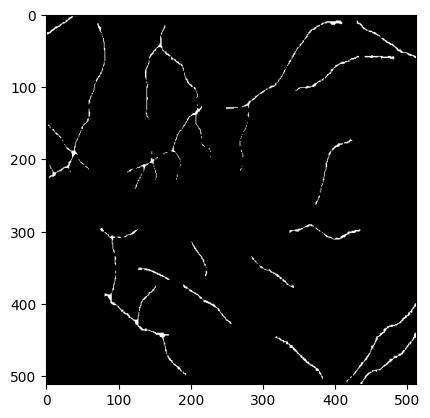

In [195]:
plt.imshow(mask_er,cmap='gray')

In [193]:
sum(df['labels'])

4087

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
parent_path = r'C:\Users\a_gadari\OneDrive - UNCG\Documents\bdml'
os.chdir(parent_path)


df = pd.read_csv('./dataframes\8xblocks_labelled_dataset_mak_eroded.csv')
labels = np.array(df['labels'])
data = np.array(df.drop(columns='labels'))

X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify = labels, test_size=0.33, random_state=21)

print(type(X_train),X_train.shape, list(X_train))

<class 'numpy.ndarray'> (2744, 64) [array([74, 74, 73, 71, 69, 71, 75, 78, 73, 73, 73, 71, 69, 71, 74, 77, 72,
       72, 72, 71, 70, 71, 74, 76, 69, 70, 72, 71, 70, 71, 73, 75, 66, 69,
       71, 72, 71, 71, 72, 74, 64, 67, 70, 72, 71, 71, 71, 72, 62, 66, 70,
       72, 72, 71, 71, 71, 61, 65, 70, 72, 72, 71, 70, 70], dtype=int64), array([82, 82, 81, 80, 80, 79, 79, 78, 83, 83, 82, 81, 79, 78, 76, 76, 84,
       83, 82, 81, 79, 77, 75, 73, 81, 81, 81, 80, 79, 77, 75, 74, 76, 77,
       79, 80, 79, 78, 76, 75, 73, 75, 77, 79, 80, 78, 77, 75, 74, 75, 78,
       79, 79, 77, 75, 73, 75, 77, 79, 80, 79, 76, 72, 70], dtype=int64), array([85, 90, 80, 91, 77, 88, 78, 83, 86, 90, 81, 90, 78, 87, 79, 83, 88,
       90, 83, 88, 79, 85, 80, 83, 90, 89, 85, 86, 81, 83, 81, 82, 92, 89,
       88, 83, 84, 81, 83, 82, 94, 89, 91, 80, 86, 78, 85, 82, 95, 88, 93,
       78, 88, 77, 86, 82, 96, 88, 94, 77, 88, 76, 86, 82], dtype=int64), array([84, 76, 72, 76, 81, 80, 75, 73, 83, 76, 73, 77, 81, 80, 76, 

In [231]:
q = list(X_train)

In [233]:
q[0].reshape(8,8)

array([[74, 74, 73, 71, 69, 71, 75, 78],
       [73, 73, 73, 71, 69, 71, 74, 77],
       [72, 72, 72, 71, 70, 71, 74, 76],
       [69, 70, 72, 71, 70, 71, 73, 75],
       [66, 69, 71, 72, 71, 71, 72, 74],
       [64, 67, 70, 72, 71, 71, 71, 72],
       [62, 66, 70, 72, 72, 71, 71, 71],
       [61, 65, 70, 72, 72, 71, 70, 70]], dtype=int64)

In [256]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


parent_path = r'C:\Users\a_gadari\OneDrive - UNCG\Documents\bdml'
os.chdir(parent_path)


df = pd.read_csv('./dataframes\8xblocks_labelled_dataset_mak_eroded.csv')
labels = np.array(df['labels'])
data = np.array(df.drop(columns='labels'))

X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify = labels, test_size=0.33, random_state=21)

x_label = ['Total','train','test']
y1 = np.array([sum(labels)/df.shape[0],sum(y_train)/X_train.shape[0],sum(y_test)/X_test.shape[0]])
y2 = np.array([100]*3) - y1
print(y1, y2)
X_axis = np.arange(len(x_label))
'''
plt.bar(X_axis - 0.2, y2,0.4, label = 'label 0')
plt.bar(X_axis + 0.2, y1,0.4, label = 'label 1')
plt.show()
'''

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(logits =2 ),metrics=['Recall'])

print(model.summary())

train_images = np.array([np.array(i).reshape(8,8) for i in list(X_train)])
test_images = np.array([np.array(i).reshape(8,8) for i in list(X_test)])

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_train.reshape(-1,1))
y_train = enc.transform(y_train.reshape(-1,1)).todense()
y_test = enc.transform(y_train.reshape(-1,1)).todense()
history = model.fit(train_images,y_train , epochs=10, validation_data=(test_images, y_test))

[0.11181641 0.11188047 0.11168639] [99.88818359 99.88811953 99.88831361]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 6, 6, 16)          160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 1, 8)           1160      
                                                                 
 flatten_3 (Flatten)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,329
Trainable params: 1,329
Non

C:\Users\a_gadari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


ValueError: in user code:

    File "C:\Users\a_gadari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\a_gadari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\a_gadari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\a_gadari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\a_gadari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\keras\engine\training.py", line 1053, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "C:\Users\a_gadari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\a_gadari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\a_gadari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\a_gadari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\a_gadari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\keras\backend.py", line 5678, in binary_crossentropy
        labels=target, logits=output

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 2)).


In [239]:
y_test_pred = model.predict(test_images)

43/43 [==============================] - 0s 1ms/step


In [242]:
y_test_pred_01 = y_test_pred>0.5

OneHotEncoder(handle_unknown='ignore')

In [250]:
k = enc.transform(y_train.reshape(-1,1))

In [253]:
k.todense()

matrix([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])

In [155]:
heq1 = cv2.imread(r'C:\Users\a_gadari\OneDrive - UNCG\Documents\bdml\big_picture\Histogram equalized Image_binary_otsu_126.0.png',cv2.IMREAD_UNCHANGED)
heq2 = cv2.imread(r'C:\Users\a_gadari\OneDrive - UNCG\Documents\bdml\big_picture\Original Image_binary_otsu_83.0.png',cv2.IMREAD_UNCHANGED)

In [179]:
q1 = heq1-heq2

In [182]:
(sum(sum(q1))/heq1.size)*100

4.119873046875

Image rotation

In [193]:
ang = 20
angr = (np.pi/180)*ang

s = np.sin(angr)
c = np.cos(angr)

r_marix = np.array([[c,-s],[s,c]])


In [219]:
img = cv2.imread(r'C:\Users\a_gadari\Downloads\me1.jpeg',cv2.IMREAD_UNCHANGED)

In [192]:
r_img = np.zeros((img[:,:,0].shape),dtype=np.uint8)

In [199]:
c,s

(0.9396926207859084, 0.3420201433256687)

In [201]:
for i in range(3):
    for j in range(3):
        c_hat = np.matmul(r_marix,np.array([[i],[j]]))
        print(c_hat[0]/s,c_hat[1]/c)

[0.] [0.]
[-1.] [1.]
[-2.] [2.]
[2.74747742] [0.36397023]
[1.74747742] [1.36397023]
[0.74747742] [2.36397023]
[5.49495484] [0.72794047]
[4.49495484] [1.72794047]
[3.49495484] [2.72794047]


In [204]:
image = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

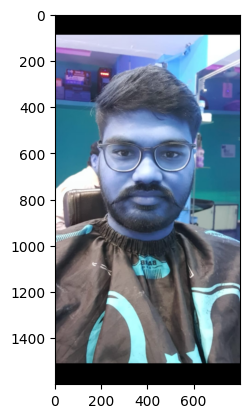

In [220]:
plt.imshow(img)

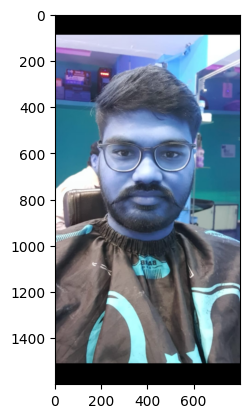

In [218]:
plt.imshow(img)

In [229]:
rot_mat = cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), 20, 1.0)
result = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)


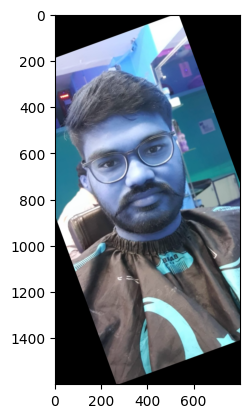

In [230]:
plt.imshow(result)

In [235]:
im1 = cv2.imread(r'C:\Users\a_gadari\Downloads\gammaLaplacianOpenOriginal1.jpg',0)
im2 = cv2.imread(r'C:\Users\a_gadari\Downloads\gammaLaplacianOpenOriginal2.jpg',0)

In [ ]:
sz = im1.shape
 
# Define the motion model
warp_mode = cv2.MOTION_EUCLIDEAN
 
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
warp_matrix = np.eye(2, 3, dtype=np.float32)
 
# Specify the number of iterations.
number_of_iterations = 5000;
 
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)
 
if warp_mode == cv2.MOTION_HOMOGRAPHY :
# Use warpPerspective for Homography
im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
# Use warpAffine for Translation, Euclidean and Affine
im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
 

In [237]:
M = cv2.getAffineTransform(im1,im2)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:3399: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 3 && dst.checkVector(2, CV_32F) == 3 in function 'cv::getAffineTransform'
